In [1]:
import numpy as np
import torch

import plotly.express as px
import plotly.graph_objects as go

from experiment import Experiment
from backpack import backpack, extend

In [2]:
def plot_data(X_train, y_train, X_test, y_test):
    fig = go.Figure([
        go.Scatter(
            name='Training data',
            x=X_train,
            y=y_train,
            mode='markers'   
        ),
        go.Scatter(
            name='MAP',
            x=X_test,
            y=y_test,
            mode='lines',
            line=dict(color='rgb(31, 119, 180)'),
    )])
    fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)

    fig.show()

In [3]:
experiment_btwn = Experiment(dataset="sinusoidal", split='between', deterministic=True,)

In [4]:
X_train, y_train  = experiment_btwn.train_dataloader.dataset.get_arrays()
X_test, y_test  = experiment_btwn.test_dataloader.dataset.get_arrays()

In [5]:
plot_data(X_train, y_train, X_test, y_test)

In [6]:
model, loss = experiment_btwn.experiment_mlp( epochs=40, lr=1e-2, check_point="mlp_btwn.pt")

Epoch 0 loss: 0.17042691599239002
Test loss: 0.5106018427759409


In [7]:
def plot_regression( X_train, y_train, X_test, f_test, y_std, title="LA"):
    fig = go.Figure([
    go.Scatter(
        name='Training data',
        x=X_train,
        y=y_train,
        mode='markers'   
    ),
    go.Scatter(
        name='MAP',
        x=X_test,
        y=f_test,
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=X_test,
        y=f_test + y_std,
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=X_test,
        y=f_test - y_std,
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
    ])
    fig.update_layout(
        yaxis_title='y',
        title='Bayesian Regression',
        hovermode="x"
    )
    fig.update_layout(
    autosize=False,
    width=1000,
    height=1000)

    
    fig.show()

    



In [9]:
model = experiment_btwn.load_model("mlp_btwn.pt")
la = experiment_btwn.train_la(model=model, dataloader=experiment_btwn.train_dataloader, subset_of_weights="all", hessian_structure="full", sigma_noise=0.075)
X_train, y_train = experiment_btwn.train_dataloader.dataset.get_arrays()
X = np.linspace(-2, 2, 1000).reshape(1000, 1)
X_test = torch.from_numpy(X.astype(np.float32))
x= X.reshape(1000)
f_mu, f_var = la(x=X_test)
f_mu = f_mu.squeeze().detach().cpu().numpy()
f_sigma = f_var.squeeze().sqrt().cpu().numpy()
pred_std = np.sqrt(f_sigma**2 + la.sigma_noise.item()**2)
plot_regression(X_train, y_train, x, f_mu, pred_std)

In [10]:
la = experiment_btwn.train_la_marglik(dataloader=experiment_btwn.train_dataloader, hessian_structure="full")
X_train, y_train = experiment_btwn.train_dataloader.dataset.get_arrays()
X = np.linspace(-2, 2, 1000).reshape(1000, 1)
X_test = torch.from_numpy(X.astype(np.float32))
x= X.reshape(1000)
f_mu, f_var = la(x=X_test)
f_mu = f_mu.squeeze().detach().cpu().numpy()
f_sigma = f_var.squeeze().sqrt().cpu().numpy()
pred_std = np.sqrt(f_sigma**2 + la.sigma_noise.item()**2)
plot_regression(X_train, y_train, x, f_mu, pred_std)

In [11]:
la = experiment_btwn.train_la_marglik(dataloader=experiment_btwn.train_dataloader, hessian_structure="kron")
X_train, y_train = experiment_btwn.train_dataloader.dataset.get_arrays()
X = np.linspace(-2, 2, 1000).reshape(1000, 1)
X_test = torch.from_numpy(X.astype(np.float32))
x= X.reshape(1000)
f_mu, f_var = la(x=X_test)
f_mu = f_mu.squeeze().detach().cpu().numpy()
f_sigma = f_var.squeeze().sqrt().cpu().numpy()
pred_std = np.sqrt(f_sigma**2 + la.sigma_noise.item()**2)
plot_regression(X_train, y_train, x, f_mu, pred_std)

In [12]:
la = experiment_btwn.train_la_marglik(dataloader=experiment_btwn.train_dataloader, hessian_structure="diag")
X_train, y_train = experiment_btwn.train_dataloader.dataset.get_arrays()
X = np.linspace(-2, 2, 1000).reshape(1000, 1)
X_test = torch.from_numpy(X.astype(np.float32))
x= X.reshape(1000)
f_mu, f_var = la(x=X_test)
f_mu = f_mu.squeeze().detach().cpu().numpy()
f_sigma = f_var.squeeze().sqrt().cpu().numpy()
pred_std = np.sqrt(f_sigma**2 + la.sigma_noise.item()**2)
plot_regression(X_train, y_train, x, f_mu, pred_std)

In [12]:
model = experiment_btwn.load_model("mlp_btwn.pt")
la = experiment_btwn.train_la(model=model, dataloader=experiment_btwn.train_dataloader, subset_of_weights="all", hessian_structure="lowrank", sigma_noise=0.075)
X_train, y_train = experiment_btwn.train_dataloader.dataset.get_arrays()
X = np.linspace(-2, 2, 1000).reshape(1000, 1)
X_test = torch.from_numpy(X.astype(np.float32))
x= X.reshape(1000)
f_mu, f_var = la(x=X_test)
f_mu = f_mu.squeeze().detach().cpu().numpy()
f_sigma = f_var.squeeze().sqrt().cpu().numpy()
pred_std = np.sqrt(f_sigma**2 + la.sigma_noise.item()**2)
plot_regression(X_train, y_train, x, f_mu, pred_std)

In [20]:
sigma_noise = 0.2
n_samples = 1000
X_train = np.concatenate([np.linspace(-1, -0.75, int(n_samples/2)), np.linspace(0.75, 1.5, int(n_samples/2))])

y_train = np.sin(np.pi * (X_train  + 0.75)) + np.random.normal(scale=sigma_noise, size=(n_samples,))

X_test = np.linspace(-2, 2, n_samples)
y_test =  np.sin(np.pi * (X_test +0.75 )) 

fig = go.Figure([
    go.Scatter(
        name='Training data',
        x=X_train,
        y=y_train,
        mode='markers'   
    ),
    go.Scatter(
        name='MAP',
        x=X_test,
        y=y_test,
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
)])

fig.show()

In [13]:
# Taken from https://github.com/AlexMeinke/certified-certain-uncertainty
import torch
from torchvision import datasets, transforms
import torch.utils.data as data_utils


train_batch_size = 128
test_batch_size = 100

path = './temp/'


def CIFAR10(train=True, batch_size=None, augm_flag=True):
    if batch_size == None:
        if train:
            batch_size=train_batch_size
        else:
            batch_size=test_batch_size

    transform_base = [transforms.ToTensor()]
    transform_train = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
        ] + transform_base)
    transform_test = transforms.Compose(transform_base)
    transform_train = transforms.RandomChoice([transform_train, transform_test])
    transform = transform_train if (augm_flag and train) else transform_test

    dataset = datasets.CIFAR10(path, train=train, transform=transform, download=True)
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=train, num_workers=4)

    return loader


def get_sinusoid_example(n_data=150, sigma_noise=0.3, batch_size=150):
    # create simple sinusoid data set
    X_train = (torch.rand(n_data) * 8).unsqueeze(-1)
    y_train = torch.sin(X_train) + torch.randn_like(X_train) * sigma_noise
    train_loader = data_utils.DataLoader(
        data_utils.TensorDataset(X_train, y_train), 
        batch_size=batch_size
    )
    X_test = torch.linspace(-5, 13, 500).unsqueeze(-1)
    return X_train, y_train, train_loader, X_test

In [14]:
import matplotlib.pyplot as plt
def plot_regression(X_train, y_train, X_test, f_test, y_std, plot=True, 
                    file_name='regression_example'):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True,
                                figsize=(4.5, 2.8))
    ax1.set_title('MAP')
    ax1.scatter(X_train.flatten(), y_train.flatten(), alpha=0.3, color='tab:orange')
    ax1.plot(X_test, f_test, color='black', label='$f_{MAP}$')
    ax1.legend()

    ax2.set_title('LA')
    ax2.scatter(X_train.flatten(), y_train.flatten(), alpha=0.3, color='tab:orange')
    ax2.plot(X_test, f_test, label='$\mathbb{E}[f]$')
    ax2.fill_between(X_test, f_test-y_std*2, f_test+y_std*2, 
                     alpha=0.3, color='tab:blue', label='$2\sqrt{\mathbb{V}\,[y]}$')
    ax2.legend()
    ax1.set_ylim([-4, 6])
    ax1.set_xlim([X_test.min(), X_test.max()])
    ax2.set_xlim([X_test.min(), X_test.max()])
    ax1.set_ylabel('$y$')
    ax1.set_xlabel('$x$')
    ax2.set_xlabel('$x$')
    plt.tight_layout()

    plt.show()
   

sigma=0.27 prior precision=0.23


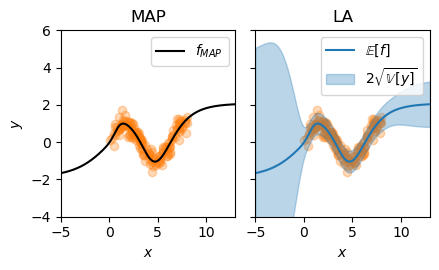

In [17]:
from laplace.baselaplace import FullLaplace
from laplace.curvature.backpack import BackPackGGN
import numpy as np
import torch

from laplace import Laplace, marglik_training



n_epochs = 1000
torch.manual_seed(711)

# create toy regression data
X_train, y_train, train_loader, X_test = get_sinusoid_example(sigma_noise=0.3)

# construct single layer neural network
def get_model():
    torch.manual_seed(711)
    return torch.nn.Sequential(
        torch.nn.Linear(1, 50), torch.nn.Tanh(), torch.nn.Linear(50, 1)
    )
model = get_model()

# train MAP
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
for i in range(n_epochs):
    for X, y in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(X), y)
        loss.backward()
        optimizer.step()

la = Laplace(model, 'regression', subset_of_weights='all', hessian_structure='kron')
la.fit(train_loader)
log_prior, log_sigma = torch.ones(1, requires_grad=True), torch.ones(1, requires_grad=True)
hyper_optimizer = torch.optim.Adam([log_prior, log_sigma], lr=1e-1)
for i in range(n_epochs):
    hyper_optimizer.zero_grad()
    neg_marglik = - la.log_marginal_likelihood(log_prior.exp(), log_sigma.exp())
    neg_marglik.backward()
    hyper_optimizer.step()

print(f'sigma={la.sigma_noise.item():.2f}',
      f'prior precision={la.prior_precision.item():.2f}')

x = X_test.flatten().cpu().numpy()
f_mu, f_var = la(X_test)
f_mu = f_mu.squeeze().detach().cpu().numpy()
f_sigma = f_var.squeeze().sqrt().cpu().numpy()
pred_std = np.sqrt(f_sigma**2 + la.sigma_noise.item()**2)

plot_regression(X_train, y_train, x, f_mu, pred_std, 
                file_name='regression_example', plot=False)

# alternatively, optimize parameters and hyperparameters of the prior jointly
# model = get_model()
# la, model, margliks, losses = marglik_training(
#     model=model, train_loader=train_loader, likelihood='regression',
#     hessian_structure='full', backend=BackPackGGN, n_epochs=n_epochs, 
#     optimizer_kwargs={'lr': 1e-2}, prior_structure='scalar'
# )

# print(f'sigma={la.sigma_noise.item():.2f}',
#       f'prior precision={la.prior_precision.numpy()}')

# f_mu, f_var = la(X_test)
# f_mu = f_mu.squeeze().detach().cpu().numpy()
# f_sigma = f_var.squeeze().sqrt().cpu().numpy()
# pred_std = np.sqrt(f_sigma**2 + la.sigma_noise.item()**2)
# plot_regression(X_train, y_train, x, f_mu, pred_std, 
#                 file_name='regression_example_online', plot=False)